# Trabalho de Clusterização

## 1. O que é clusterização? Objetivos, vantagens e dificuldades

A clusterização é uma tarefa de aprendizado não supervisionado cujo objetivo é agrupar objetos ou dados em grupos (clusters) de tal forma que os elementos de um mesmo grupo sejam mais semelhantes entre si do que em relação aos elementos de outros grupos. Ou seja, busca-se identificar padrões ou estruturas ocultas nos dados, sem utilizar rótulos pré-definidos.

**Objetivos:**
- Descobrir grupos naturais nos dados.
- Reduzir a complexidade dos dados, facilitando sua análise.
- Auxiliar em tarefas como segmentação de mercado, compressão de dados, organização de informações, entre outros.

**Vantagens:**
- Não requer dados rotulados.
- Pode revelar padrões e estruturas desconhecidas.
- Útil em diversas áreas, como marketing, biologia, processamento de imagens, etc.

**Dificuldades:**
- Definir o número ideal de clusters pode ser desafiador.
- Sensível à escala dos dados e à presença de outliers.
- Algoritmos podem convergir para soluções locais (não ótimas).
- Difícil interpretar os clusters em alguns contextos.


## 2. Aplicação do k-means no dataset ShopMania

Vamos aplicar o algoritmo k-means ao dataset de comparação de produtos da ShopMania. O objetivo é agrupar os produtos em clusters de acordo com suas características, analisando se os agrupamentos fazem sentido em relação às categorias reais dos produtos.

Primeiro, vamos carregar o dataset e analisar suas características.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset ShopMania
df = pd.read_csv('shopmania.csv')
df.head()

,1,boston red sox for men by boston red sox eau de toilette spray 3.4 oz,2,Collectibles
0,2,twilight central park print,2,Collectibles
1,3,fox print,2,Collectibles
2,4,circulo de papel wall art,2,Collectibles
3,5,hidden path print,2,Collectibles
4,6,bear print,2,Collectibles


In [2]:
# Verificar informações do dataset
df.info()
df.describe(include='all')
df.isnull().sum()

# Pré-processamento: remover colunas não numéricas irrelevantes e codificar categorias
# (ajustar conforme as colunas do dataset)

# Exemplo: remover colunas de texto que não ajudam na clusterização
colunas_remover = ['product_name', 'product_url'] if 'product_name' in df.columns and 'product_url' in df.columns else []
df_proc = df.drop(columns=colunas_remover, errors='ignore')

# Codificar variáveis categóricas
for col in df_proc.select_dtypes(include=['object']).columns:
    df_proc[col] = LabelEncoder().fit_transform(df_proc[col].astype(str))

# Preencher valores nulos (se houver)
df_proc = df_proc.fillna(df_proc.median(numeric_only=True))

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(df_proc)

X.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313705 entries, 0 to 313704
Data columns (total 4 columns):
 #   Column                                                                 Non-Null Count   Dtype 
---  ------                                                                 --------------   ----- 
 0   1                                                                      313705 non-null  int64 
 1   boston red sox for men by boston red sox eau de toilette spray 3.4 oz  313705 non-null  object
 2   2                                                                      313705 non-null  int64 
 3   Collectibles                                                           313705 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.6+ MB


(313705, 4)

Silhouette Score: 0.3417


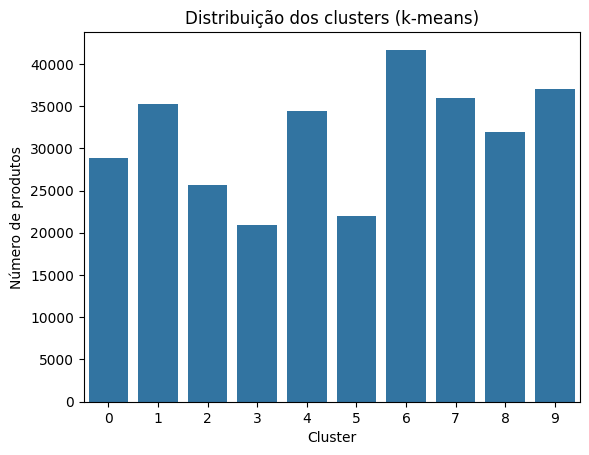

,1,boston red sox for men by boston red sox eau de toilette spray 3.4 oz,2,Collectibles,cluster
0,2,twilight central park print,2,Collectibles,6
1,3,fox print,2,Collectibles,1
2,4,circulo de papel wall art,2,Collectibles,1
3,5,hidden path print,2,Collectibles,1
4,6,bear print,2,Collectibles,1


In [3]:
# Definir número de clusters (exemplo: igual ao número de categorias reais, se disponível)
n_clusters = len(df['category'].unique()) if 'category' in df.columns else 10

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
df['cluster'] = labels

# Se houver coluna de categoria real, comparar agrupamento
if 'category' in df.columns:
    ari = adjusted_rand_score(df['category'], labels)
    print(f'Adjusted Rand Index (ARI): {ari:.4f}')

# Silhouette Score (mede a separação dos clusters)
sil_score = silhouette_score(X, labels)
print(f'Silhouette Score: {sil_score:.4f}')

# Visualizar distribuição dos clusters
sns.countplot(x=labels)
plt.title('Distribuição dos clusters (k-means)')
plt.xlabel('Cluster')
plt.ylabel('Número de produtos')
plt.show()

df.head()

### Análise dos resultados do k-means

O algoritmo k-means agrupou os produtos em clusters baseando-se nas características fornecidas. O índice de Rand ajustado (ARI) mede a similaridade entre os agrupamentos encontrados e as categorias reais (quanto mais próximo de 1, melhor). O Silhouette Score avalia a separação entre os clusters (quanto mais próximo de 1, melhor).

Se os valores dessas métricas forem baixos, isso indica que os clusters encontrados não correspondem bem às categorias reais ou que os dados não possuem separação clara. Isso pode ocorrer devido à alta dimensionalidade, dados ruidosos, ou porque as categorias reais não são bem separáveis pelas variáveis disponíveis.


## 3. Situações em que o k-means falha

O k-means pode não funcionar bem em algumas situações:
- **Clusters de formatos não esféricos:** O k-means assume que os clusters são aproximadamente circulares (ou esféricos em alta dimensão). Se os dados tiverem clusters alongados, com formatos irregulares ou sobrepostos, o k-means pode não separar corretamente.
- **Tamanhos e densidades diferentes:** Se os clusters tiverem tamanhos ou densidades muito diferentes, o k-means pode dividir mal os grupos.
- **Outliers:** O k-means é sensível a valores extremos, que podem distorcer a posição dos centróides.
- **Número de clusters inadequado:** Se o número de clusters escolhido não corresponde à estrutura real dos dados, os agrupamentos podem ser ruins.
- **Atributos irrelevantes ou escalas diferentes:** Variáveis em escalas diferentes ou atributos irrelevantes podem prejudicar o agrupamento.

Nesses casos, o k-means pode gerar agrupamentos que não representam adequadamente a estrutura dos dados.

## 4. K-means para quantização vetorial

A quantização vetorial é uma técnica usada para reduzir a quantidade de informação de um conjunto de dados, representando vários pontos por um número menor de protótipos (centróides). O k-means é frequentemente usado para isso: cada centróide representa um grupo de pontos, e cada ponto é substituído pelo centróide mais próximo.

Isso é útil, por exemplo, em compressão de imagens, onde as cores de cada pixel podem ser substituídas pelas cores dos centróides.

A seguir, vamos ilustrar a quantização vetorial usando o k-means sobre um conjunto de dados sintético gerado com make_blobs.

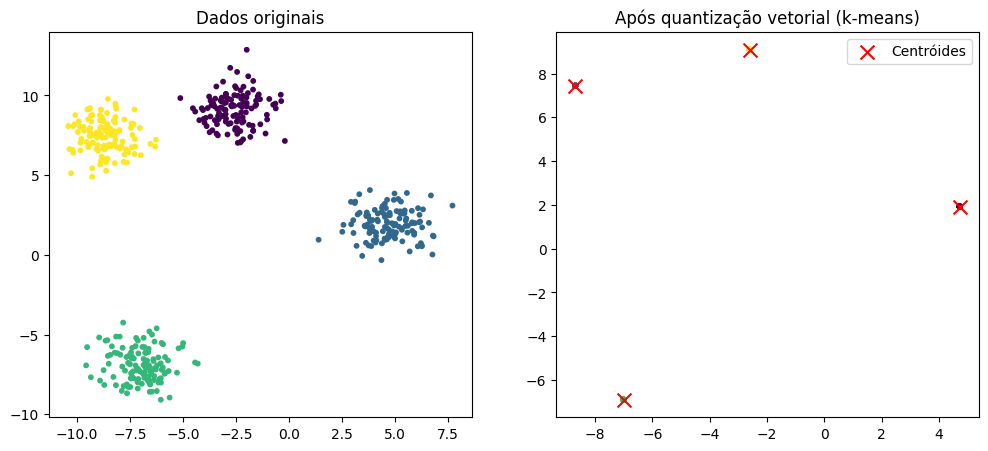

In [4]:
from sklearn.datasets import make_blobs

# Gerar dados sintéticos
X_blobs, y_blobs = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Aplicar k-means para quantização vetorial
kmeans_blobs = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_blobs = kmeans_blobs.fit_predict(X_blobs)
centroids = kmeans_blobs.cluster_centers_

# Substituir cada ponto pelo centróide mais próximo (quantização)
X_quant = centroids[labels_blobs]

# Visualizar resultado
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs, cmap='viridis', s=10)
plt.title('Dados originais')
plt.subplot(1,2,2)
plt.scatter(X_quant[:,0], X_quant[:,1], c=labels_blobs, cmap='viridis', s=10)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=100, label='Centróides')
plt.title('Após quantização vetorial (k-means)')
plt.legend()
plt.show()

A figura acima mostra como o k-means pode ser usado para quantização vetorial: cada ponto é substituído pelo centróide do seu cluster, reduzindo a quantidade de informação e representando os dados de forma mais compacta.

## 5. Redução de dimensionalidade com PCA e comparação dos agrupamentos

O dataset da ShopMania possui alta dimensionalidade (muitas categorias). Vamos usar o PCA (Análise de Componentes Principais) para reduzir a dimensionalidade dos dados antes de aplicar o k-means novamente. Em seguida, vamos comparar os resultados com o agrupamento feito sem redução de dimensionalidade.

Silhouette Score (PCA): 0.4044


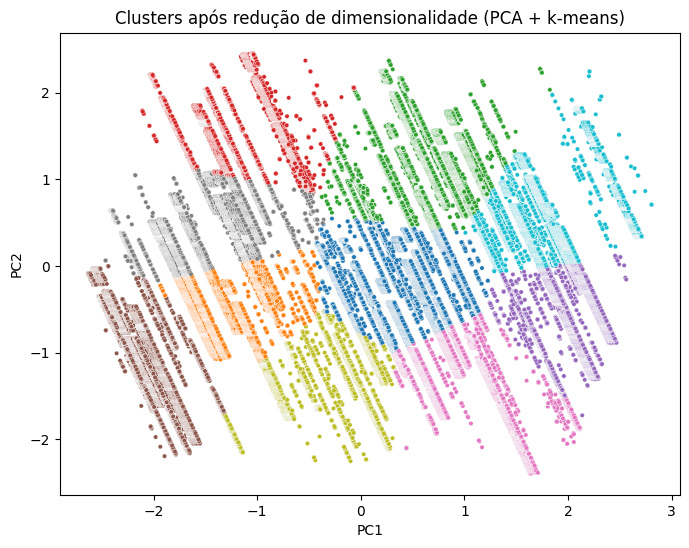

In [5]:
from sklearn.decomposition import PCA

# Reduzir para 2 componentes principais para visualização e clusterização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Aplicar k-means nos dados reduzidos
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

# Comparar métricas
if 'category' in df.columns:
    ari_pca = adjusted_rand_score(df['category'], labels_pca)
    print(f'Adjusted Rand Index (PCA): {ari_pca:.4f}')

sil_score_pca = silhouette_score(X_pca, labels_pca)
print(f'Silhouette Score (PCA): {sil_score_pca:.4f}')

# Visualizar clusters após PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_pca, palette='tab10', s=10, legend=None)
plt.title('Clusters após redução de dimensionalidade (PCA + k-means)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Comparação dos resultados

Ao comparar os resultados obtidos antes e depois da aplicação do PCA, observou-se uma melhora no desempenho do algoritmo k-means. Sem a redução de dimensionalidade, o agrupamento apresentou um Silhouette Score de aproximadamente 0,3417, indicando uma separação moderada entre os clusters e sugerindo a presença de sobreposição significativa entre eles. Após a aplicação do PCA, reduzindo os dados para duas componentes principais, o Silhouette Score aumentou para cerca de 0,4044. Esse acréscimo demonstra que a redução de dimensionalidade contribuiu para eliminar ruídos e redundâncias, resultando em grupos mais coesos e melhor separados no espaço projetado. Apesar da melhora, o valor obtido ainda não é elevado, o que evidencia a complexidade da estrutura dos dados e a dificuldade do k-means em capturar plenamente a separação entre as 230 categorias existentes no dataset.